# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
cities

['bethel',
 'goderich',
 'hilo',
 'topolobampo',
 'provideniya',
 'atuona',
 'hermanus',
 'puerto ayora',
 'baoning',
 'necochea',
 'faanui',
 'rey bouba',
 'polillo',
 'castro',
 'shu',
 'busselton',
 'sept-iles',
 'alofi',
 'ushuaia',
 'port lincoln',
 'mildura',
 'wattegama',
 'duz',
 'constitucion',
 'nikolskoye',
 'barrow',
 'sungaipenuh',
 'butaritari',
 'new norfolk',
 'taltal',
 'cherskiy',
 'botwood',
 'barentsburg',
 'saint-philippe',
 'bredasdorp',
 'bukachacha',
 'mataura',
 'harper',
 'clyde river',
 'san cristobal',
 'paamiut',
 'madang',
 'vila velha',
 'qaanaaq',
 'sitka',
 'dikson',
 'saint george',
 'nuuk',
 'saskylakh',
 'north platte',
 'bargal',
 'balkhash',
 'chuguyevka',
 'attawapiskat',
 'ca mau',
 'flinders',
 'povenets',
 'tasiilaq',
 'porbandar',
 'georgetown',
 'punta arenas',
 'saleaula',
 'palmas',
 'hobart',
 'caluquembe',
 'illoqqortoormiut',
 'wasilla',
 'sao filipe',
 'albany',
 'linjiang',
 'cape town',
 'gulshat',
 'mitu',
 'great bend',
 'hazorasp',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_df =pd.DataFrame(columns = ["City","Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed",  "Country",
                                    "Date"])

In [5]:
count=1
sets=0
index=0 


print(f'Beginning Data Retrieval \n ........................')

for city in cities: 
    try:
        format_city=city.replace(" ", "%20") 
        url= "http://api.openweathermap.org/data/2.5/weather?q="+format_city+"&appid="+weather_api_key
        city_stats = requests.get(url).json()
        print(f'Processing Record {count} of Set {sets} | {city}' )
        weather_df.at[index, "City"]= city_stats["name"]
        weather_df.at[index, "Cloudiness"]= city_stats["clouds"]["all"]
        weather_df.at[index, "Country"]= city_stats["sys"]["country"]
        weather_df.at[index, "Date"]= city_stats["dt"]
        weather_df.at[index, "Max Temp"]= city_stats["main"]["temp_max"]
        weather_df.at[index, "Wind Speed"]= city_stats["wind"]["speed"]
        weather_df.at[index, "Lat"]= city_stats["coord"]["lat"]
        weather_df.at[index, "Lng"]= city_stats["coord"]["lon"]
        weather_df.at[index, "Humidity"]= city_stats["main"]["humidity"]
        index = index +1 
 
    except Exception as e:
        print (f"City not found. Skipping...")
   
print(f"Data Retrieval Complete")

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | bethel
Processing Record 1 of Set 0 | goderich
Processing Record 1 of Set 0 | hilo
Processing Record 1 of Set 0 | topolobampo
Processing Record 1 of Set 0 | provideniya
Processing Record 1 of Set 0 | atuona
Processing Record 1 of Set 0 | hermanus
Processing Record 1 of Set 0 | puerto ayora
Processing Record 1 of Set 0 | baoning
Processing Record 1 of Set 0 | necochea
Processing Record 1 of Set 0 | faanui
Processing Record 1 of Set 0 | rey bouba
Processing Record 1 of Set 0 | polillo
Processing Record 1 of Set 0 | castro
Processing Record 1 of Set 0 | shu
Processing Record 1 of Set 0 | busselton
Processing Record 1 of Set 0 | sept-iles
Processing Record 1 of Set 0 | alofi
Processing Record 1 of Set 0 | ushuaia
Processing Record 1 of Set 0 | port lincoln
Processing Record 1 of Set 0 | mildura
Processing Record 1 of Set 0 | wattegama
Processing Record 1 of Set 0 | duz
City not found. Skipping...
Processing 

Processing Record 1 of Set 0 | esplanada
Processing Record 1 of Set 0 | jamestown
Processing Record 1 of Set 0 | erzin
Processing Record 1 of Set 0 | kolchugino
Processing Record 1 of Set 0 | boende
Processing Record 1 of Set 0 | sorland
Processing Record 1 of Set 0 | joigny
Processing Record 1 of Set 0 | chagda
City not found. Skipping...
Processing Record 1 of Set 0 | adrar
Processing Record 1 of Set 0 | chuy
Processing Record 1 of Set 0 | salina
Processing Record 1 of Set 0 | luderitz
Processing Record 1 of Set 0 | viligili
City not found. Skipping...
Processing Record 1 of Set 0 | guerrero negro
Processing Record 1 of Set 0 | sola
Processing Record 1 of Set 0 | evensk
Processing Record 1 of Set 0 | oistins
Processing Record 1 of Set 0 | saurimo
Processing Record 1 of Set 0 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 0 | moree
Processing Record 1 of Set 0 | buala
Processing Record 1 of Set 0 | yelizovo
Processing Record 1 of Set 0 | half moon bay
Processing Rec

Processing Record 1 of Set 0 | rajauri
Processing Record 1 of Set 0 | xai-xai
Processing Record 1 of Set 0 | tortoli
Processing Record 1 of Set 0 | kavieng
Processing Record 1 of Set 0 | honavar
Processing Record 1 of Set 0 | nizhniy tsasuchey
Processing Record 1 of Set 0 | kutum
Processing Record 1 of Set 0 | gamba
Processing Record 1 of Set 0 | bengkulu
Processing Record 1 of Set 0 | huarmey
Processing Record 1 of Set 0 | amuntai
Processing Record 1 of Set 0 | axim
Processing Record 1 of Set 0 | altay
Processing Record 1 of Set 0 | meulaboh
Processing Record 1 of Set 0 | daigo
Processing Record 1 of Set 0 | denia
Processing Record 1 of Set 0 | isangel
Processing Record 1 of Set 0 | esperance
Processing Record 1 of Set 0 | monzon
Processing Record 1 of Set 0 | sangar
Processing Record 1 of Set 0 | fairbanks
Processing Record 1 of Set 0 | ixtapa
Processing Record 1 of Set 0 | oussouye
Processing Record 1 of Set 0 | polson
Processing Record 1 of Set 0 | suba
Processing Record 1 of Set 0

Processing Record 1 of Set 0 | riberalta
Processing Record 1 of Set 0 | galgani
City not found. Skipping...
Processing Record 1 of Set 0 | dujuma
City not found. Skipping...
Processing Record 1 of Set 0 | ust-nera
Processing Record 1 of Set 0 | vanavara
Processing Record 1 of Set 0 | den helder
Processing Record 1 of Set 0 | zhangjiakou
Processing Record 1 of Set 0 | pittsburg
Processing Record 1 of Set 0 | yeppoon
Processing Record 1 of Set 0 | curvelo
Processing Record 1 of Set 0 | meyungs
City not found. Skipping...
Processing Record 1 of Set 0 | koumra
Processing Record 1 of Set 0 | santa isabel do rio negro
Processing Record 1 of Set 0 | mabaruma
Processing Record 1 of Set 0 | rorvik
Processing Record 1 of Set 0 | savelugu
Processing Record 1 of Set 0 | englehart
Processing Record 1 of Set 0 | lakhdenpokhya
Processing Record 1 of Set 0 | tanggu
Processing Record 1 of Set 0 | tawkar
City not found. Skipping...
Processing Record 1 of Set 0 | el faiyum
City not found. Skipping...
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("city_data.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,296.48,88,75,3.1,US,1591915860
1,Goderich,43.75,-81.72,293.71,62,0,7.15,CA,1591916401
2,Hilo,19.73,-155.09,301.15,61,75,5.1,US,1591915700
3,Topolobampo,25.6,-109.05,307.59,52,5,7.7,MX,1591916402
4,Provideniya,64.38,-173.3,286.79,51,51,2.13,RU,1591915966
...,...,...,...,...,...,...,...,...,...
575,Sabang,5.89,95.32,301.96,75,88,3.93,ID,1591916601
576,Namatanai,-3.67,152.43,301.47,74,92,1.82,PG,1591916601
577,Wanning,18.8,110.4,300.68,84,28,3.54,CN,1591916184
578,Sines Municipality,37.96,-8.87,288.71,85,46,1.79,PT,1591916602


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather2_df = weather_df.loc[(weather_df['Humidity'] <= 100) ]
weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,296.48,88,75,3.1,US,1591915860
1,Goderich,43.75,-81.72,293.71,62,0,7.15,CA,1591916401
2,Hilo,19.73,-155.09,301.15,61,75,5.1,US,1591915700
3,Topolobampo,25.6,-109.05,307.59,52,5,7.7,MX,1591916402
4,Provideniya,64.38,-173.3,286.79,51,51,2.13,RU,1591915966
...,...,...,...,...,...,...,...,...,...
575,Sabang,5.89,95.32,301.96,75,88,3.93,ID,1591916601
576,Namatanai,-3.67,152.43,301.47,74,92,1.82,PG,1591916601
577,Wanning,18.8,110.4,300.68,84,28,3.54,CN,1591916184
578,Sines Municipality,37.96,-8.87,288.71,85,46,1.79,PT,1591916602


In [8]:
# Export the City_Data into a csv
weather2_df.to_csv("clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

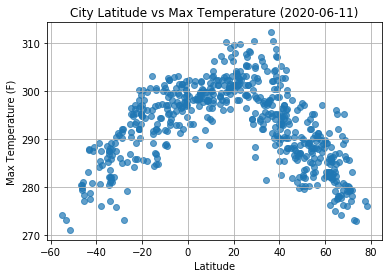

In [9]:
plt.scatter(weather2_df["Lat"], weather2_df["Max Temp"], alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatTemperature.png")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

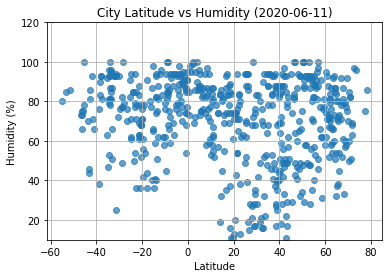

In [10]:
plt.scatter(weather2_df["Lat"], weather2_df["Humidity"], alpha=0.7)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

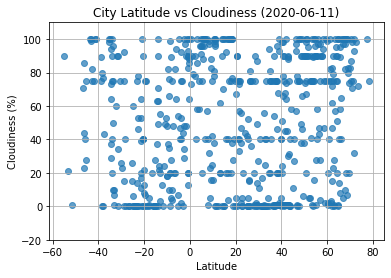

In [11]:
plt.scatter(weather2_df["Lat"], weather2_df["Cloudiness"], alpha=0.7)
plt.ylim(-20,(weather2_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

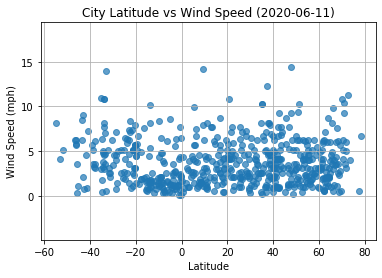

In [12]:
plt.scatter(weather2_df["Lat"], weather2_df["Wind Speed"], alpha=0.7)
plt.ylim((weather2_df["Wind Speed"].min()-5),(weather2_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.grid()
plt.show()

## Linear Regression

In [49]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y, xlabel, ylabel, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x,y)
    regress_values = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line,(10,280),fontsize=15,color="red")
    
    if slope < 0:
        print(f"R-Squared Value: -{r_value**2}")
    else:
        print(f"R-Squared Value: {r_value**2}")
        
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather2_df['Lat']>= 0]
southern_df = weather_df[weather2_df['Lat']<0]

In [15]:
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,296.48,88,75,3.1,US,1591915860
1,Goderich,43.75,-81.72,293.71,62,0,7.15,CA,1591916401
2,Hilo,19.73,-155.09,301.15,61,75,5.1,US,1591915700
3,Topolobampo,25.6,-109.05,307.59,52,5,7.7,MX,1591916402
4,Provideniya,64.38,-173.3,286.79,51,51,2.13,RU,1591915966


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value: -0.5633496774591178


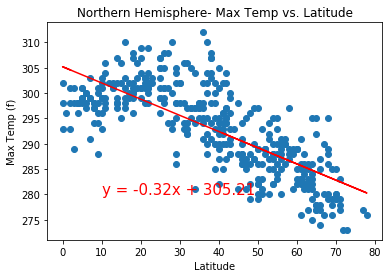

In [50]:
linear_regression(northern_df['Lat'].astype(int),northern_df['Max Temp'].astype(int), "Latitude","Max Temp (f)", "Northern Hemisphere- Max Temp vs. Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value: 0.6164430541661731


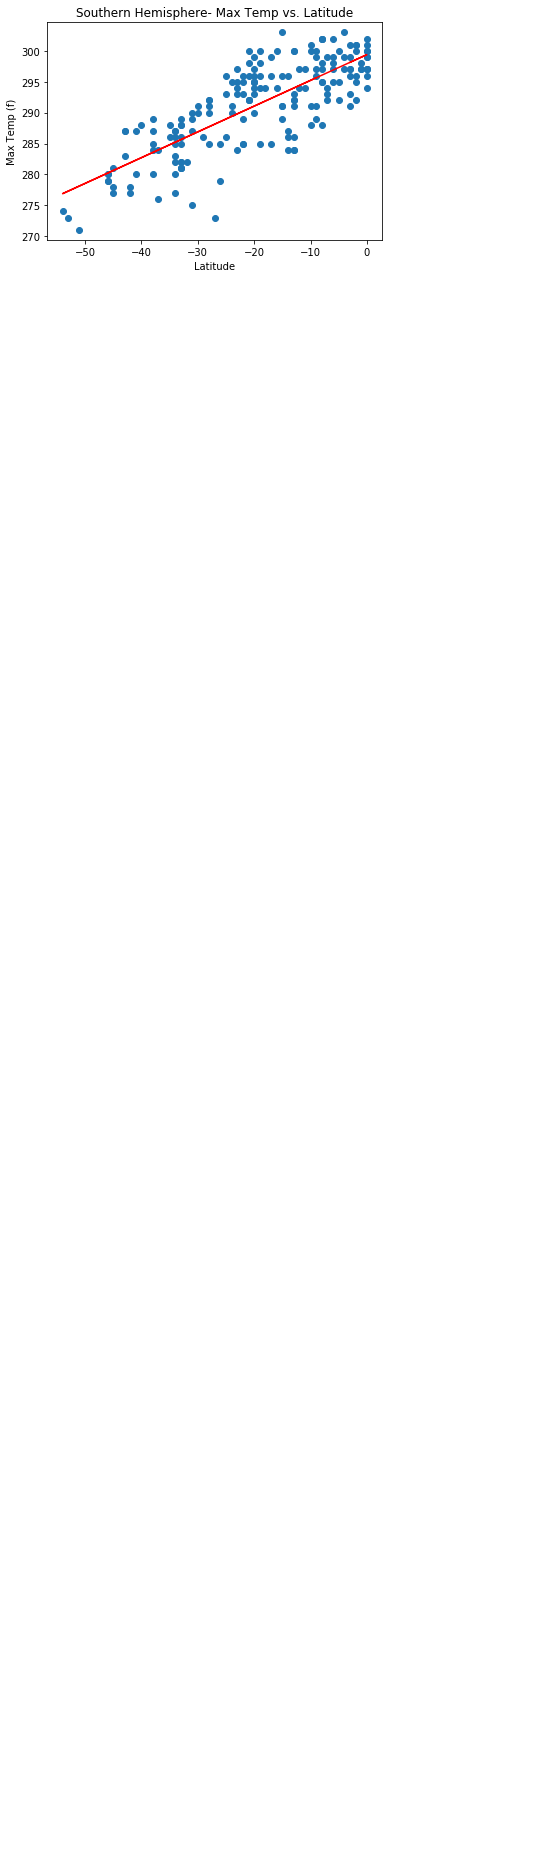

In [28]:
linear_regression(southern_df['Lat'].astype(int),southern_df['Max Temp'].astype(int), "Latitude","Max Temp (f)", "Southern Hemisphere- Max Temp vs. Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value: -0.00013923856034749258


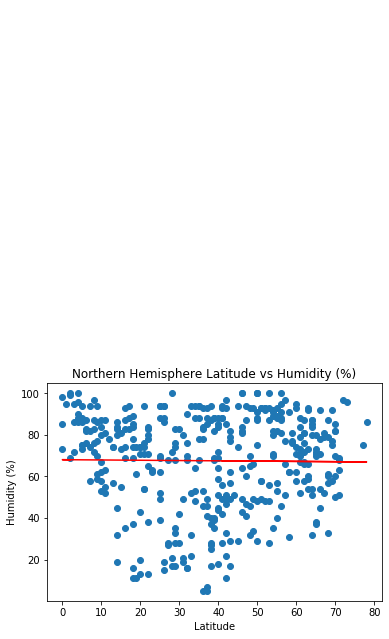

In [18]:
linear_regression(northern_df['Lat'].astype(int),northern_df['Humidity'].astype(int),"Latitude","Humidity (%)", "Northern Hemisphere Latitude vs Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value: 0.007824951065299613


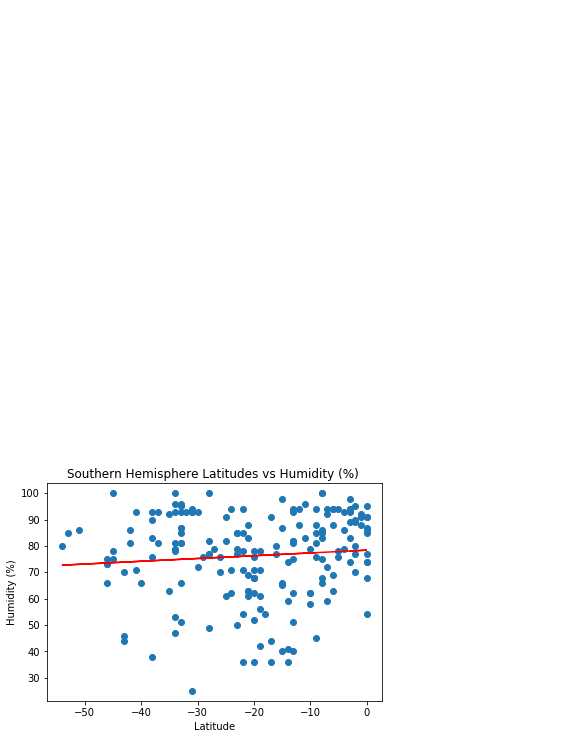

In [19]:
linear_regression(southern_df['Lat'].astype(int),southern_df['Humidity'].astype(int),"Latitude","Humidity (%)", "Southern Hemisphere Latitudes vs Humidity (%) ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value: 0.004753759122332257


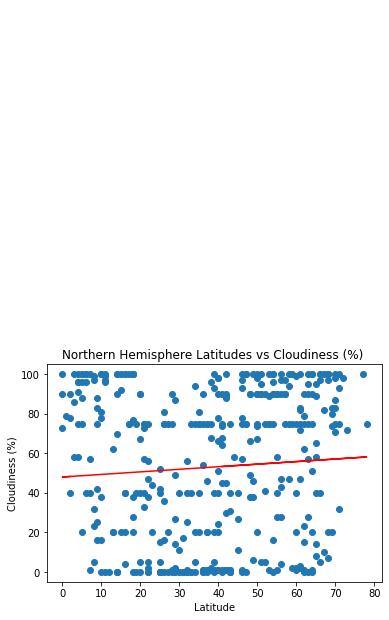

In [20]:
linear_regression(northern_df['Lat'].astype(int),northern_df['Cloudiness'].astype(int),"Latitude","Cloudiness (%)", "Northern Hemisphere Latitudes vs Cloudiness (%) ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value: -0.005340813913517342


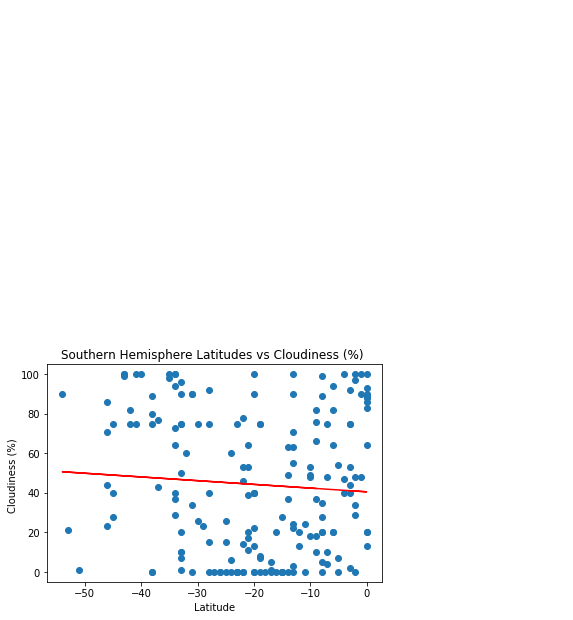

In [21]:
linear_regression(southern_df['Lat'].astype(int),southern_df['Cloudiness'].astype(int),"Latitude","Cloudiness (%) ", "Southern Hemisphere Latitudes vs Cloudiness (%) ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value: 0.0067303596481123554


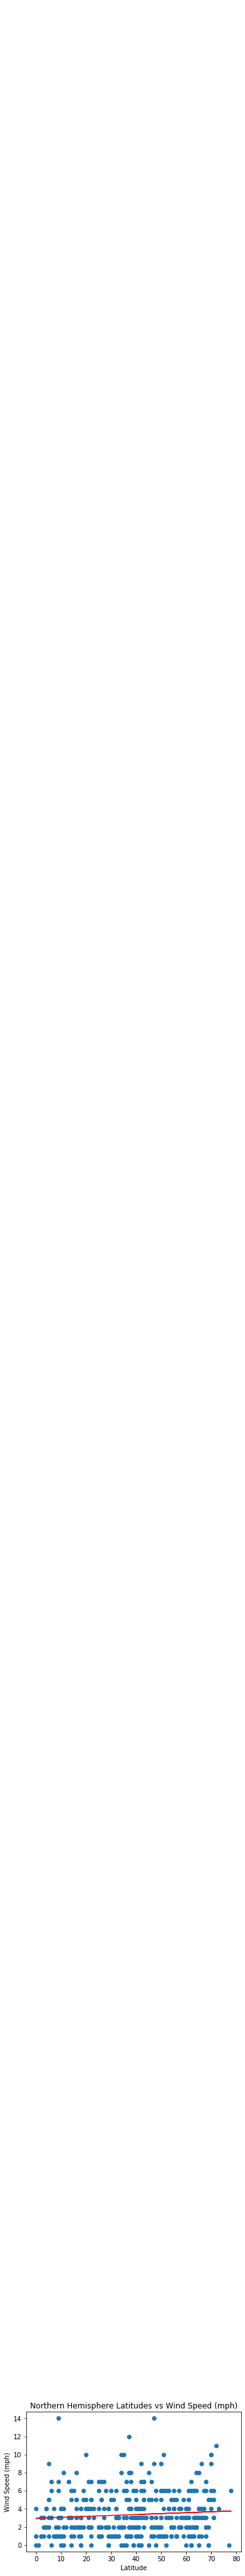

In [22]:
linear_regression(northern_df['Lat'].astype(int),northern_df['Wind Speed'].astype(int),"Latitude","Wind Speed (mph)", "Northern Hemisphere Latitudes vs Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value: -0.13577364682779444


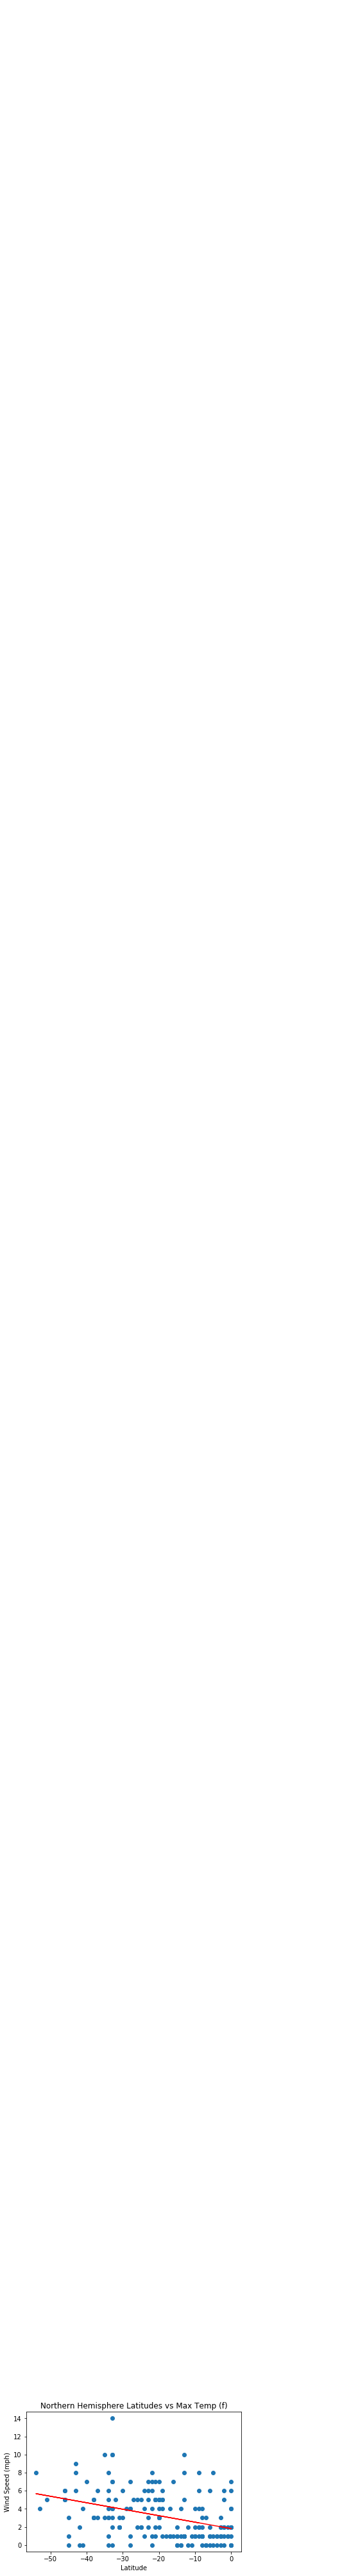

In [23]:
linear_regression(southern_df['Lat'].astype(int),southern_df['Wind Speed'].astype(int),"Latitude","Wind Speed (mph)", "Northern Hemisphere Latitudes vs Max Temp (f)")